In [3]:
import pandas as pd

data = pd.read_csv('../Udemy/mercedesbenz.csv')

In [4]:
data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
data.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [17]:
# lets take a look at how many labels in each column

for column in data.columns:
    print(column, ':', len(data[column].unique()), 'labels')

X1 : 27 labels
X2 : 44 labels
X3 : 7 labels
X4 : 4 labels
X5 : 29 labels
X6 : 12 labels


In [20]:
# if I hot encode those columns, how many columns will I obtain?

pd.get_dummies(data, drop_first=True).shape

(4209, 117)

In [21]:
data.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


We can see that from just 6 initial categorical variables, we end up with 117 new variables.

These numbers are still not huge, and in practice we could work with them relatively easily. However, in business datasets and also other Kaggle or KDD datasets, it is not unusual to find several categorical variables with multiple labels. And if we use one hot encoding on them, we will end up with datasets with thousands of columns.

What can we do instead?

In the winning solution of the KDD 2009 cup: "Winning the KDD Cup Orange Challenge with Ensemble Selection" (http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf), the authors limit one hot encoding to the 10 most frequent labels of the variable. This means that they would make one binary variable for each of the 10 most frequent labels only. This is equivalent to grouping all the other labels under a new category, that in this case will be dropped. Thus, the 10 new dummy variables indicate if one of the 10 most frequent labels is present (1) or not (0) for a particular observation.

How can we do that in python

In [25]:
# Lets find the top 10 most frequent categories for variable X2

top10 = data.X2.value_counts().sort_values(ascending=False).head(10)

<AxesSubplot:>

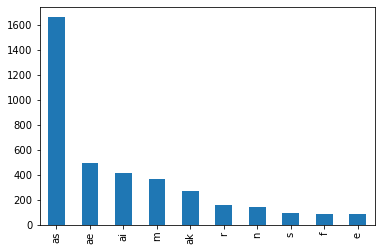

In [34]:
import matplotlib.pyplot as plt
top10.plot(kind='bar')

In [39]:
top_10 = [x for x in top10.index]
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [46]:
# we make the 10 binari variables
import numpy as np

for label in top_10:
    data[label] = np.where(data['X2']==label, 1, 0)
data[['as']+top_10].head()   

,as,as,ae,ai,m,ak,r,n,s,f,e
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [47]:
# get whole set of dummy variables, for all the categorical variables

def one_hot_top_x(df, variable, top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(data[variable]==label, 1, 0)
data = pd.read_csv('../Udemy/mercedesbenz.csv', usecols=['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])    
one_hot_top_x(data, 'X2', top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,1,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,1,0,0,0


In [50]:
top_10 = [x for x in data.X1.value_counts().sort_values(ascending=False).head(10).index]

In [51]:
top_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [53]:
one_hot_top_x(data, 'X1', top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X1_aa,X1_s,X1_b,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### One Hot encoding of top variables
### Advantages
- Straightforward to implement
- Does not require hrs of variable exploration
- Does not expand massively the feature space (number of columns in the dataset)
### Disadvantages
- Does not add any information that may make the variable more predictive
- Does not keep the information of the ignored labels
Because it is not unusual that categorical variables have a few dominating categories and the remaining labels add mostly noise, this is a quite simple and straightforward approach that may be useful on many occasions.

It is worth noting that the top 10 variables is a totally arbitrary number. You could also choose the top 5, or top 20.

This modelling was more than enough for the team to win the KDD 2009 cup. They did do some other powerful feature engineering as we will see in following lectures, that improved the performance of the variables dramatically.